In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
import sys
sys.path.append('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/src/MA_Diffusion_base_trajectory_prediction')

from utils.data_utils import TDRIVE, GEOLIFE, load_data, calculate_bbox_and_filter, \
    plot_coordinates, plot_paths, load_new_format, find_cycles, split_cycle_in_paths, \
    plot_histograms_before_after_split, \
    get_edge_used_by_trajectories, modify_and_save_data

# Data Loading

In [4]:
# WHICH = TDRIVE
# Paths to cleaned and filtered data
GEOLIFE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/geolife.h5'
TDRIVE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive.h5'
MUNICH_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/munich.h5'
# pNEUMA dataset is not in the correct format yet
PNEUMA_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/pNEUMA.h5'
# merged_path = GEOLIFE_PATH if WHICH == GEOLIFE else TDRIVE_PATH

In [6]:
paths, node_coord, edges = load_new_format(PNEUMA_PATH)

100%|██████████| 10336/10336 [00:16<00:00, 617.16it/s]


In [10]:
print(paths[:1])

[{'coordinates': array([[0.5699498 , 0.40487685],
       [0.56984753, 0.40480014],
       [0.56997537, 0.40454445],
       [0.56989866, 0.40459559],
       [0.56989866, 0.40482571],
       [0.56984753, 0.40446774],
       [0.56992423, 0.40449331],
       [0.56979639, 0.40449331],
       [0.56250903, 0.40329153],
       [0.5673417 , 0.39827988],
       [0.52571427, 0.42448879],
       [0.52072818, 0.45460987],
       [0.48270608, 0.4821484 ],
       [0.36334685, 0.58583343],
       [0.31803738, 0.60590562],
       [0.32862323, 0.6488371 ],
       [0.31957156, 0.58723976],
       [0.35204505, 0.57021036],
       [0.517174  , 0.57557999],
       [0.74528105, 0.56558225],
       [0.75361677, 0.57982456],
       [0.75364234, 0.5798757 ],
       [0.7535912 , 0.5799524 ],
       [0.75361677, 0.57979899],
       [0.75354006, 0.57997797],
       [0.7348742 , 0.55599362],
       [0.76420261, 0.48447525],
       [0.7624383 , 0.37378413],
       [0.73536002, 0.37235223],
       [0.73354457, 0.3581

In [13]:
paths, node_coordinates, edges = load_new_format(TDRIVE_PATH)
# edge_coordinates = node_coordinates[edges]

100%|██████████| 7218/7218 [00:12<00:00, 591.86it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
print()

In [22]:
# Number of Edges
num_edges = len(edges)
print("Number of Edges:", num_edges)

# Number of Nodes
num_nodes = len(node_coordinates)
print("Number of Nodes:", num_nodes)

# Distribution of Path Lengths
path_lengths = [len(path['edge_idxs']) for path in paths]

avg_length = round(sum(path_lengths) / len(path_lengths), 2)
print(f"Average length: {avg_length} edges")

path = np.random.randint(len(paths))
print(f'Exemplary Path: {path}')
print(paths[path])
print('\nCoordinates:')
#print(paths[path]['coordinates'])
print('\nTimestamps:')
#print(paths[path]['timestamps'])
print('\nTaxi Index:')
#print(paths[path]['taxi_idx'])
print('\nEdge Indexes:')
print(paths[path]['edge_idxs'])

Number of Edges: 1378
Number of Nodes: 825
Average length: 6.9 edges
Exemplary Path: 115478
{'edge_idxs': array([518, 890, 563, 577, 582, 569, 636, 639, 622]), 'edge_orientation': array([1, 0, 0, 1, 0, 1, 0, 1, 0]), 'num_observations_per_edge': array([ 5, 31, 16, 20, 18, 15, 26,  9, 26]), 'raw_idx_to_edge_idx': array([ 518,  518,  518,  518,  518,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  890,  890,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  890,  890,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  563,  563,  563,  563,  563,  563,  563,  563,
        563,  563,  563,  563,  563,  563,  563,  563,  577,  577,  577,
        577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
        577,  577,  577,  577,  577,  577,  582,  582,  582,  582,  582,
        582,  582,  582,  582,  582,  582,  582,  582,  582,  582,  582,
        582,  582,  569,  569,  569,  569,  569,  569,  569,  569,  569,
        569,  569,  569,  569,

  0%|          | 0/4 [00:00<?, ?it/s]


KeyError: 'coordinates'

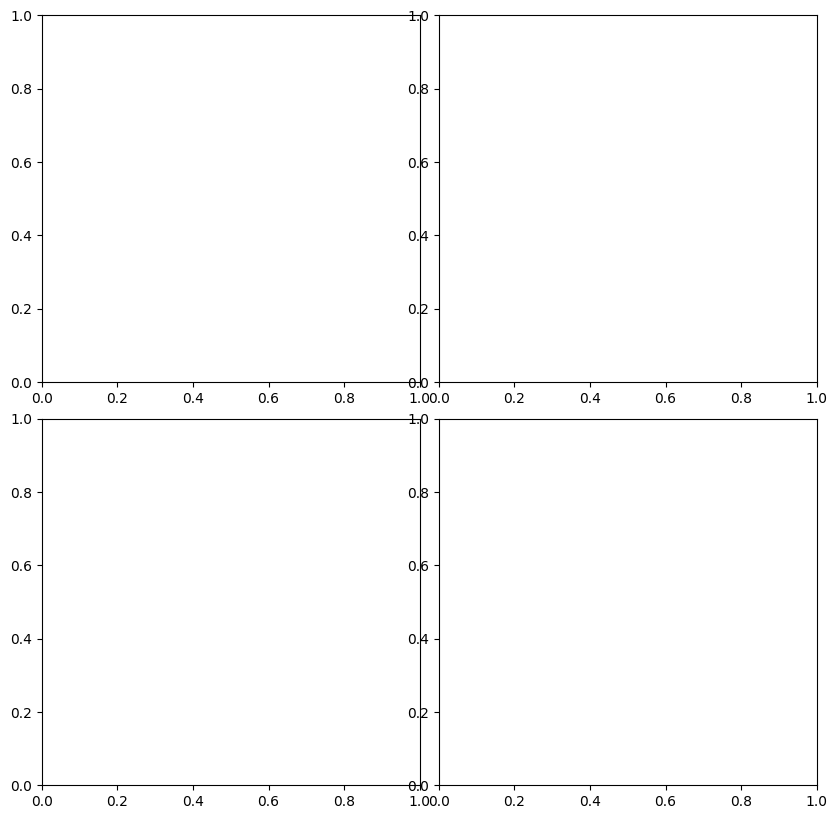

In [16]:
plot_paths(paths, node_coordinates, edges, num_paths_to_plot=4, random=False, start_id=path)

# Filtering

## Cycle Filtering

In [17]:
cycles = find_cycles(paths)
print("Number of paths with cycles:", np.sum(cycles))

  0%|          | 0/173770 [00:00<?, ?it/s]

100%|██████████| 173770/173770 [00:03<00:00, 45532.42it/s]

Number of paths with cycles: 3180


### Plot Paths with Cycles

  0%|          | 0/4 [00:00<?, ?it/s]


KeyError: 'coordinates'

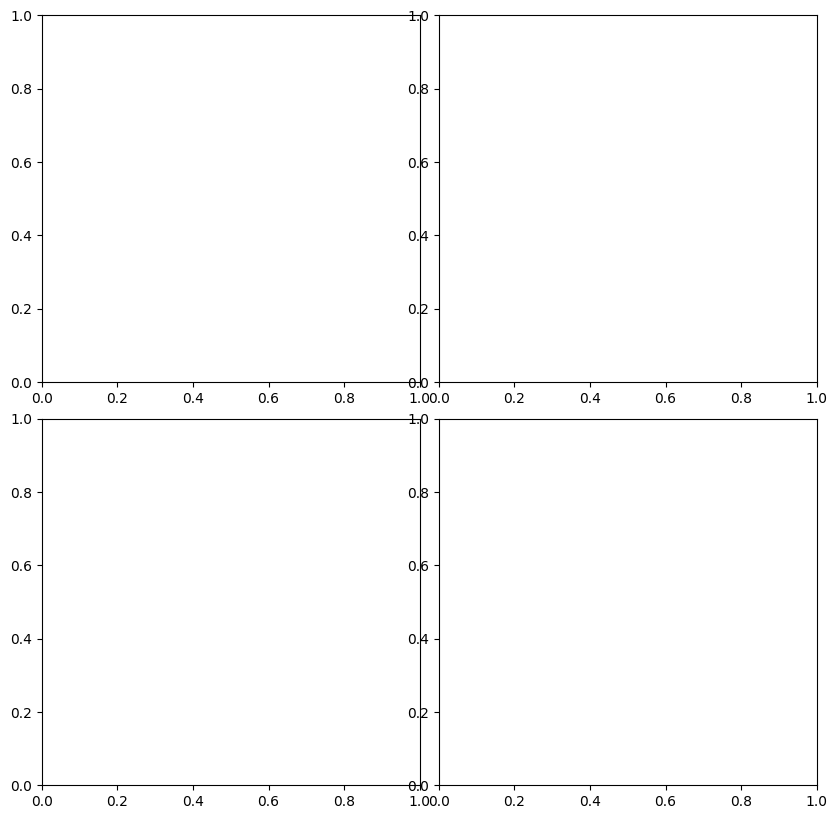

In [18]:
paths_with_cycles = list(path for path, mask in zip(paths, cycles) if mask)
plot_paths(paths_with_cycles, node_coordinates, edges)

### Split paths with cycles

In [19]:
split_paths = split_cycle_in_paths(paths)
print(
    f"Number of paths before split: {len(paths)}, after split: {len(split_paths)}, ratio: {len(split_paths) / len(paths)}")
print("Number of paths with cycles after split:", np.sum(find_cycles(split_paths)))

  0%|          | 0/173770 [00:00<?, ?it/s]


KeyError: 'edge_observation_ranges'

### Plot Splitted Paths

100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


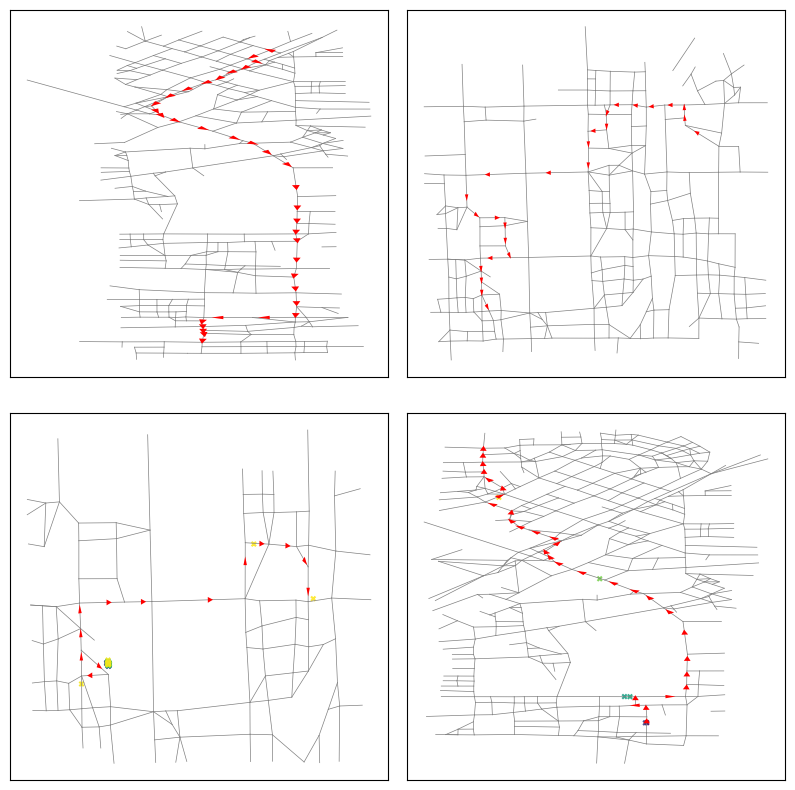

In [ ]:
plot_paths(split_paths, node_coordinates, edges)

## Remove Short Paths (<5 edges)

In [20]:
num_edges_before_split = np.array([len(path['edge_idxs']) for path in paths])
num_edges_after_split = np.array([len(path['edge_idxs']) for path in split_paths])
print(
    f"Number of paths smaller than 5 before split: {np.sum(num_edges_before_split < 5)} out of {len(num_edges_before_split)}, ratio: {np.sum(num_edges_before_split < 5) / len(num_edges_before_split)}")
print(
    f"Number of paths smaller than 5 after split: {np.sum(num_edges_after_split < 5)} out of {len(num_edges_after_split)}, ratio: {np.sum(num_edges_after_split < 5) / len(num_edges_after_split)}")

NameError: name 'split_paths' is not defined

In [45]:
path_length_cutoff_value = 5
longer_paths = [path for path in split_paths if len(path['edge_idxs']) >= path_length_cutoff_value]
print(
    f"Number of paths longer than {path_length_cutoff_value}: {len(longer_paths)} out of {len(split_paths)}, ratio: {len(longer_paths) / len(split_paths)}")

Number of paths longer than 5: 7218 out of 7218, ratio: 1.0


In [42]:
import h5py
import torch
from tqdm import tqdm
def load_new_format(file_path, device):
        paths = []
        with h5py.File(file_path, 'r') as new_hf:
            node_coordinates = torch.tensor(new_hf['graph']['node_coordinates'][:], dtype=torch.float, device=device)
            # Normalize the coordinates to (0, 1) if any of the coordinates is larger than 1
            if node_coordinates.max() > 1:
                max_values = node_coordinates.max(0)[0]
                min_values = node_coordinates.min(0)[0]
                node_coordinates[:, 0] = (node_coordinates[:, 0] - min_values[0]) / (max_values[0] - min_values[0])
                node_coordinates[:, 1] = (node_coordinates[:, 1] - min_values[1]) / (max_values[1] - min_values[1])
            #edges = torch.tensor(new_hf['graph']['edges'][:], dtype=torch.long, device=device)
            edges = new_hf['graph']['edges'][:]
            edge_coordinates = node_coordinates[edges]
            nodes = [(i, {'pos': torch.tensor(pos, device=device)}) for i, pos in enumerate(node_coordinates)]
            #edges = [(torch.tensor(edge[0], device=device), torch.tensor(edge[1], device=device)) for edge in edges]
            edges = [tuple(edge) for edge in edges]

            '''nodes = [(i, {'pos': tuple(pos)}) for i, pos in enumerate(node_coordinates)]
            edges = [tuple(edge) for edge in edges]'''

            for i in tqdm(new_hf['trajectories'].keys()):
                path_group = new_hf['trajectories'][i]
                path = {attr: torch.tensor(path_group[attr][()], device=device) for attr in path_group.keys() if attr in ['coordinates', 'edge_idxs', 'edge_orientations']}
                # path = {attr: path_group[attr][()] for attr in path_group.keys()}
                paths.append(path)
            
        return paths, nodes, edges, edge_coordinates
    
# paths, nodes, edges, edge_coordinates = load_new_format('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive_train.h5', 'cpu')

In [23]:
print(paths)

[{'coordinates': tensor([[0.7536, 0.5798],
        [0.7536, 0.5799],
        [0.7536, 0.5800],
        [0.7536, 0.5798],
        [0.7535, 0.5800],
        [0.7349, 0.5560],
        [0.7642, 0.4845],
        [0.7624, 0.3738],
        [0.7354, 0.3724],
        [0.7335, 0.3581],
        [0.7338, 0.3530],
        [0.7338, 0.3540],
        [0.7339, 0.3562],
        [0.7339, 0.3573]], dtype=torch.float64), 'edge_idxs': tensor([15116, 15115, 15117,   470,   471, 16749,   462,   466, 11607, 11606,
        11486, 11122,  5276,  3908,  2138,  2137,  4117,  4116,  8745,  9139,
         9138,  1169,  1170,  1541,  1540,  5274,    65,    67,   550,  3004,
         3001,  8710,  8709, 14955,  9668]), 'edge_orientations': tensor([-1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
         1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1])}, {'coordinates': tensor([[0.6353, 0.4560],
        [0.6004, 0.4451],
        [0.5575, 0.4358],
        [0.5706, 0.4125]], dty

In [24]:
print(nodes)

[(0, {'pos': tensor([0.3632, 0.5948])}), (1, {'pos': tensor([0.3629, 0.6093])}), (2, {'pos': tensor([0.4224, 0.4183])}), (3, {'pos': tensor([0.2548, 0.2530])}), (4, {'pos': tensor([0.3927, 0.1782])}), (5, {'pos': tensor([0.3342, 0.6133])}), (6, {'pos': tensor([0.5003, 0.6186])}), (7, {'pos': tensor([0.4106, 0.4805])}), (8, {'pos': tensor([0.3408, 0.6352])}), (9, {'pos': tensor([0.3434, 0.6273])}), (10, {'pos': tensor([0.3418, 0.6307])}), (11, {'pos': tensor([0.3495, 0.6188])}), (12, {'pos': tensor([0.3504, 0.6096])}), (13, {'pos': tensor([0.2120, 0.5295])}), (14, {'pos': tensor([0.5609, 0.6821])}), (15, {'pos': tensor([0.2445, 0.5457])}), (16, {'pos': tensor([0.4082, 0.6759])}), (17, {'pos': tensor([0.5951, 0.2264])}), (18, {'pos': tensor([0.6076, 0.2263])}), (19, {'pos': tensor([0.7652, 0.3797])}), (20, {'pos': tensor([0.5819, 0.5020])}), (21, {'pos': tensor([0.5042, 0.6320])}), (22, {'pos': tensor([0.5328, 0.5758])}), (23, {'pos': tensor([0.5069, 0.5828])}), (24, {'pos': tensor([0.50

In [15]:
print(edges)

[(0, 6154), (0, 8268), (0, 3616), (1, 1903), (1, 1870), (1, 2683), (2, 1260), (2, 8269), (2, 8944), (2, 3458), (2, 9784), (3, 7486), (3, 7627), (3, 1566), (4, 52), (5, 1667), (5, 6221), (5, 1873), (6, 1373), (6, 1405), (6, 1365), (6, 1679), (7, 2423), (7, 1672), (7, 2086), (7, 6116), (7, 783), (8, 10), (8, 1420), (8, 8460), (9, 617), (9, 1884), (9, 10), (10, 8361), (10, 617), (11, 1884), (11, 597), (11, 2045), (11, 55), (12, 1898), (12, 8272), (12, 2045), (12, 2683), (12, 8273), (12, 63), (12, 6221), (13, 400), (14, 2873), (15, 1761), (15, 8500), (15, 8276), (15, 2174), (16, 2663), (16, 6963), (16, 9686), (16, 4916), (17, 520), (17, 2933), (17, 98), (17, 8985), (18, 4664), (18, 2932), (18, 6826), (18, 99), (19, 74), (19, 1764), (19, 8804), (19, 162), (20, 791), (20, 9066), (20, 7188), (20, 7337), (21, 9037), (21, 96), (21, 9036), (22, 7919), (22, 7826), (22, 9498), (23, 81), (23, 2923), (23, 24), (24, 1891), (24, 1892), (25, 3988), (26, 85), (27, 673), (27, 3199), (27, 28), (28, 49), (

In [25]:
print(edge_coordinates)

tensor([[[0.3632, 0.5948],
         [0.3659, 0.5968]],

        [[0.3632, 0.5948],
         [0.3633, 0.5973]],

        [[0.3632, 0.5948],
         [0.3633, 0.5876]],

        ...,

        [[0.1909, 0.0703],
         [0.1897, 0.0668]],

        [[0.2672, 0.1776],
         [0.2613, 0.1787]],

        [[0.1039, 0.2023],
         [0.1030, 0.2052]]])


In [43]:
paths, nodes, edges, edge_coordinates = load_new_format('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/munich_train.h5', 'cpu')

/tmp/ipykernel_1695351/1743104744.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nodes = [(i, {'pos': torch.tensor(pos, device=device)}) for i, pos in enumerate(node_coordinates)]
100%|██████████| 2436/2436 [00:03<00:00, 783.34it/s]


In [44]:
print(paths)

[{'coordinates': tensor([], dtype=torch.float64), 'edge_idxs': tensor([ 467,  120, 4480, 6745, 6679, 4455,  578, 3108, 3113, 3093, 7253, 5209,
        2333, 4581, 7254, 5148, 3022, 5221, 7156, 7226, 7230, 8842, 5381,  942,
         479,   13, 2453, 2408,  206, 3247, 7143, 6643, 6753, 4597, 5048, 8553,
        6895, 6881, 8501, 4861,  739, 5053]), 'edge_orientations': tensor([-1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, -1,  1,  1])}, {'coordinates': tensor([], dtype=torch.float64), 'edge_idxs': tensor([ 434, 2730, 7050, 6850, 6849, 6843, 2675, 4400, 9151, 3492, 1197, 4418,
        4697, 4695, 6923]), 'edge_orientations': tensor([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1])}, {'coordinates': tensor([], dtype=torch.float64), 'edge_idxs': tensor([ 2524,  2505,  2508,   290,   269,  2538,   282,   287,   267,   314,
          313,   317,   299,   30

In [45]:
print(nodes)

[(0, {'pos': tensor([0.2314, 0.9831])}), (1, {'pos': tensor([0.6068, 0.0516])}), (2, {'pos': tensor([0.5191, 0.7440])}), (3, {'pos': tensor([0.3086, 0.9506])}), (4, {'pos': tensor([0.2721, 0.9540])}), (5, {'pos': tensor([0.0195, 0.5179])}), (6, {'pos': tensor([0.7365, 0.3533])}), (7, {'pos': tensor([0.5150, 0.7944])}), (8, {'pos': tensor([0.6143, 0.9315])}), (9, {'pos': tensor([0.6201, 0.9228])}), (10, {'pos': tensor([0.8863, 0.6553])}), (11, {'pos': tensor([0.3432, 0.7307])}), (12, {'pos': tensor([0.2501, 0.0640])}), (13, {'pos': tensor([0.4192, 0.6324])}), (14, {'pos': tensor([0.3379, 0.6016])}), (15, {'pos': tensor([0.0138, 0.1746])}), (16, {'pos': tensor([0.8531, 0.4658])}), (17, {'pos': tensor([0.3048, 0.6800])}), (18, {'pos': tensor([0.4496, 0.6847])}), (19, {'pos': tensor([0.3843, 0.7094])}), (20, {'pos': tensor([0.4644, 0.4164])}), (21, {'pos': tensor([0.4243, 0.4277])}), (22, {'pos': tensor([0.3966, 0.4247])}), (23, {'pos': tensor([0.5535, 0.7292])}), (24, {'pos': tensor([0.35

In [46]:
print(edges)

[(2396, 3828), (629, 637), (2561, 690), (123, 1318), (3856, 3921), (2708, 7625), (618, 3838), (81, 3444), (647, 662), (238, 618), (2561, 39), (4585, 5638), (3922, 3921), (1330, 7057), (4537, 823), (4561, 123), (618, 2685), (7744, 2101), (7782, 49), (1578, 93), (49, 653), (626, 645), (5032, 5020), (23, 4634), (1825, 4191), (49, 1303), (7295, 638), (123, 4562), (8311, 8392), (1666, 7553), (5588, 1484), (459, 4082), (4697, 474), (5963, 2621), (4104, 301), (4393, 8510), (644, 1665), (3424, 15), (4134, 45), (1031, 7713), (3447, 31), (1303, 3432), (4559, 640), (331, 396), (1820, 1646), (914, 644), (4169, 1879), (8089, 4987), (28, 649), (8476, 418), (2120, 1296), (1106, 293), (417, 486), (4104, 3855), (718, 391), (1239, 19), (654, 1450), (43, 450), (650, 316), (1649, 4134), (1285, 1248), (3331, 532), (1574, 3811), (506, 4300), (2684, 7638), (1314, 43), (19, 294), (3925, 7339), (114, 752), (916, 1001), (2400, 2682), (3868, 2400), (645, 8661), (92, 644), (23, 8729), (486, 1350), (388, 394), (69

In [47]:
print(edge_coordinates.tolist())

[[[0.9645290970802307, 0.9602063298225403], [0.9851160049438477, 0.9998947381973267]], [[0.25241005420684814, 0.5139488577842712], [0.22534340620040894, 0.5141593813896179]], [[0.31410008668899536, 0.6044846773147583], [0.3072848618030548, 0.6078534722328186]], [[0.18833644688129425, 0.7934519648551941], [0.18305730819702148, 0.7909253835678101]], [[0.8737773299217224, 0.17454469203948975], [0.8589992523193359, 0.20570586621761322]], [[0.6680673956871033, 0.37014421820640564], [0.6824570298194885, 0.3624592125415802]], [[0.9019033312797546, 0.848720908164978], [0.8988311886787415, 0.8532477021217346]], [[0.13568629324436188, 0.6401726603507996], [0.1383170336484909, 0.6479629278182983]], [[0.7362724542617798, 0.47847142815589905], [0.7274974584579468, 0.4576271176338196]], [[0.883029043674469, 0.8136646151542664], [0.9019033312797546, 0.848720908164978]], [[0.31410008668899536, 0.6044846773147583], [0.3211977779865265, 0.6003789901733398]], [[0.003019174328073859, 0.4859458804130554], 